# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Zeinab Sharifi
2.   Student Number: 400205566


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [186]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
dataset = dataset.sample(frac=1).reset_index(drop=True) #shuffle dataset

x_train = dataset.to_numpy()[0:int(0.8*dataset.shape[0]),1]
y_train = dataset.to_numpy()[0:int(0.8*dataset.shape[0]),2]

x_test = dataset.to_numpy()[int(0.8*dataset.shape[0]):,1]
y_test = dataset.to_numpy()[int(0.8*dataset.shape[0]):,2]

# print(x_train.shape) 400
# print(x_test.shape) 100
# print(y_train.shape) 400
# print(y_test.shape) 100

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [190]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A = np.column_stack(( x_train,np.ones(x_train.shape[0]))) #add a 1 column
m = np.linalg.pinv(A.T@A) @ A.T @ y_train

m

array([-1.03128197,  0.84520413])

In [193]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train,predicted_train_y)
test_error = mean_squared_error(y_test,predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3366461016476991
MSE test error: 0.30752758274788233


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

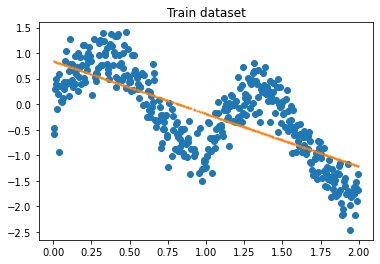

In [194]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

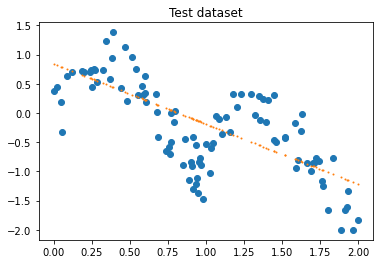

In [195]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

-write here-
##### Although our model could grab the decreasing trend in dataset(the drawn line was the best linear model possible), it was too simple to show the polynomial relationship between X & Y.
##### Test and train error values are near. Our model is also not complex enough. so the model is underfit

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-
##### as it's a local model in which nearer samples have greater weights in predicting y, it should do better than linear model

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [196]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp((xi-the_query_point)*(xi-the_query_point).T/ (-2.0*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [197]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    #next line was changed because of the following error
    #"all the input arrays must have same number of dimensions, 
    #but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)""
    X = np.column_stack((train_X, np.ones(l)))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.pinv(X.T@ W @ X) @ X.T @ W @ train_Y
    #print(qx.shape)
    #print(theta.shape)
    return np.dot(qx, theta.T)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [227]:
hyperparameter = 0.03 #this value is chosen after testing a range of values from 0.1 to 0.001
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = mean_squared_error(y_test,np.squeeze(predicted_test))
print(f"MSE test error: {error}")

MSE test error: 0.09221806394232036


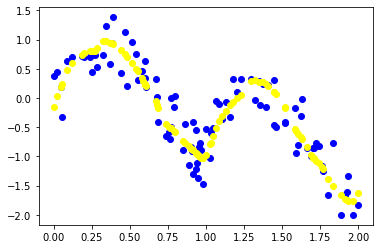

In [228]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

-write here-
##### the model now can follow the polynomial shape of data. our test error has also decreased significantly. (the error on train data was also checked and it had the same order)

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here-
##### KNN is another local model which gives more weight to near samples, so it should perform well

### Part10:
Implementing the `KNN model`.

In [229]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.sqrt(np.sum((x1-x2)**2)) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = np.zeros(self.X.shape[0]) #array to store distance from all samples
        for i in range(self.X.shape[0]):
            distances[i] = self.distance(x,self.X[i])
        idx = distances.argsort() #sort indices in decreasing order
        indices = idx[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[neareest_indices].mean() #predicted y is the mean of k nearest neighbors
        return predicted_y

In [230]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test,np.squeeze(predicted_y))
    return error, predicted_y

In [231]:
#5-fold cross validation
K = [2,3,5,10,15,20,25,30,40,50]
fold = 5
l = x_train.shape[0]
fold_l = int(l/fold) #size of each fold
err = []
for k in K:
    error_tmp = 0
    for i in range(fold):
        x_test_tmp = x_train[i*fold_l:(i+1)*fold_l]
        y_test_tmp = y_train[i*fold_l:(i+1)*fold_l]
        x_train_tmp = np.delete(x_train,np.arange(int(i*fold_l), int((i+1)*fold_l), 1)) #delete the test fold from x_train
        y_train_tmp = np.delete(y_train,np.arange(int(i*fold_l), int((i+1)*fold_l), 1)) # #delete the test fold from y_train
        error_knn, predicted_y = evaluation(k, x_train_tmp, y_train_tmp, x_test_tmp, y_test_tmp)
        error_tmp+=error_knn #add error of the i-th fold to total error
    error_tmp /=fold #mean of total error
    err.append(error_tmp)
    
    
k_final = K[err.index(min(err))]
print(f"Best k from 5-fold cross validation: {k_final}")
error_knn, predicted_y = evaluation(k_final, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

Best k from 5-fold cross validation: 20
MSE error of KNN for test dataset: 0.09089329544041076


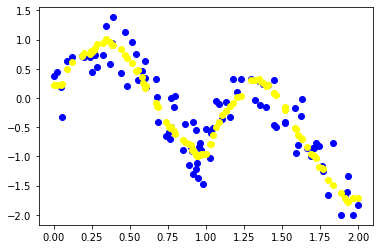

In [232]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

-write here-
##### we got almost the same results as local weighted linear regression. both accuracy and polt are acceptable